<a href="https://colab.research.google.com/github/fjoaovictor/Titanic_MachineLearning/blob/main/Train-ML-Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix,recall_score,precision_score

import statsmodels.api as sm



In [ ]:
test = pd.read_csv('sample_data/test.csv')
train = pd.read_csv('sample_data/train.csv')

In [ ]:
def binarySex(var):
  if var == 'male':
    return 1
  else:
    return 0

In [ ]:
train['Sex'] = train['Sex'].map(binarySex)
test['Sex'] = test['Sex'].map(binarySex)

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    int64  
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(6), object(4)
memory usage: 83.7+ KB


In [ ]:
#Verifica dados nulos
train.isnull().values.any()

True

In [ ]:
#Tratamento dos dados nulos
train['Age'] = train['Age'].fillna(-1)

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    int64  
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(6), object(4)
memory usage: 83.7+ KB


In [ ]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
#Escolher principais colunas
cl_vars = ['Pclass','Sex', 'Age', 'SibSp', 'Parch', 'Fare','Survived']


In [ ]:
train_vars = train[cl_vars]

# Utilizando algoritimo de **regressão logistica**

Teste para saber qual tipo de algoritimo irá trazer melhores resultados.

<Axes: >

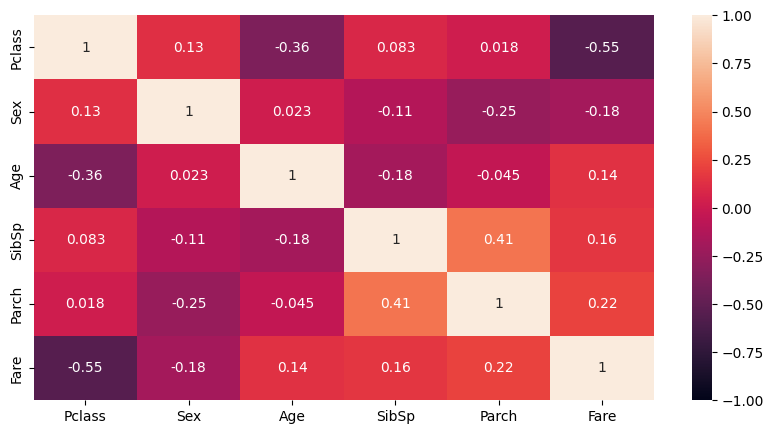

In [ ]:
#Verificando correlação
plt.figure(figsize=(10,5))
sns.heatmap(train_vars.corr(),annot=True, vmin=-1, vmax=1)

In [ ]:
train_vars['Survived'].value_counts(normalize=True)

Survived
0    0.616162
1    0.383838
Name: proportion, dtype: float64

In [ ]:
x = train_vars.drop('Survived', axis=1)
y = train_vars['Survived']

In [ ]:
x = sm.add_constant(x)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)


In [ ]:
logit = sm.Logit(y_train, x_train.astype(float))
lg = logit.fit()

Optimization terminated successfully.
         Current function value: 0.431773
         Iterations 6


In [ ]:
print(lg.summary())

                           Logit Regression Results                           
Dep. Variable:               Survived   No. Observations:                  623
Model:                          Logit   Df Residuals:                      616
Method:                           MLE   Df Model:                            6
Date:                Wed, 17 Jul 2024   Pseudo R-squ.:                  0.3417
Time:                        13:59:26   Log-Likelihood:                -268.99
converged:                       True   LL-Null:                       -408.62
Covariance Type:            nonrobust   LLR p-value:                 2.275e-57
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.1346      0.549      7.530      0.000       3.059       5.211
Pclass        -1.0964      0.169     -6.475      0.000      -1.428      -0.765
Sex           -2.8548      0.239    -11.940      0.0

<Axes: >

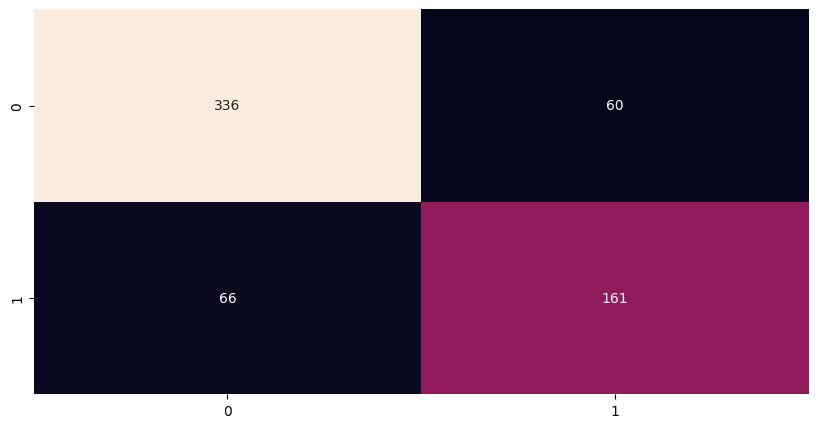

In [ ]:
pred_train = lg.predict(x_train) > 0.5
pred_train = np.round(pred_train)

cm = confusion_matrix(y_train, pred_train)

plt.figure(figsize=(10,5))
sns.heatmap(cm, annot=True, fmt='g', cbar=False)

In [ ]:
acc = accuracy_score(y_train, pred_train)
prec = precision_score(y_train, pred_train)
rec = recall_score(y_train, pred_train)

print(f'Accuracy: {round(acc, 2)*100}%')
print(f'Precision: {round(prec, 2)*100}%')
print(f'Recall: {round(rec, 2)*100}%')


Accuracy: 80.0%
Precision: 73.0%
Recall: 71.0%


# Utilizando algoritimo de **sistema neural**
Teste para saber qual tipo de algoritimo irá trazer melhores resultados.

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
vars_x = ['Sex', 'Age']
x = train[vars_x]
y = train['Survived']

In [ ]:
modelo = RandomForestClassifier(n_estimators=100,n_jobs=-1, random_state=0)

In [ ]:
np.random.seed(0)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)

In [ ]:
x_test.head()


,Sex,Age
862,0,48.0
223,1,-1.0
84,0,17.0
680,0,-1.0
535,0,7.0


In [ ]:
modelo.fit(x_train, y_train)

RandomForestClassifier(n_jobs=-1, random_state=0)

In [ ]:
p = modelo.predict(x_test)

In [ ]:
np.mean(y_test==p)

0.7313432835820896

In [ ]:
sub = pd.Series(p, index=x_test['Sex'], name='Survived')
sub.shape

(268,)

In [ ]:
sub.to_csv('submission1.csv', header=True)